In [29]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [30]:
# Import the dataset
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model

# Import the backend
from keras import backend as K

from keras import optimizers

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
# Reshape 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convert to float32 for type consistency
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of pixels)
x_train /= 255
x_test /= 255

# # Print sample sizes
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [121]:
# Start with a simple sequential model
model = Sequential()

# Multi Layer Perceptron 
model.add(Dense(512
                , activation = 
                #'elu'
                #'softmax'
                #'selu'
                #'softplus'
                #'softsign'
                'relu' #this one
                #'tanh'
                #'sigmoid'
                #'hard_sigmoid'
                #'exponential'
                #'linear'
                , input_shape = (784,)))
model.add(Dropout(0.05))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.05))
model.add(Dense(10, activation='softmax'))

# model.summary()

# Compile the model to put it all together.
model.compile(loss = 'categorical_crossentropy',
              optimizer =  
              #'SGD'
              'RMSprop' #this one
              #'Adagrad'
              #'Adadelta'
              #'Adam' #maybe this one
              #'Adamax'
              #'Nadam'
              , metrics = ['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.2623 - accuracy: 0.9238 - val_loss: 0.1332 - val_accuracy: 0.9602
Epoch 2/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.1076 - accuracy: 0.9678 - val_loss: 0.0890 - val_accuracy: 0.9732
Epoch 3/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0715 - accuracy: 0.9782 - val_loss: 0.0756 - val_accuracy: 0.9765
Epoch 4/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0783 - val_accuracy: 0.9768
Epoch 5/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 6/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0669 - val_accuracy: 0.9808
Epoch 7/15
60000/60000 [==============================] - 5s 86us/st

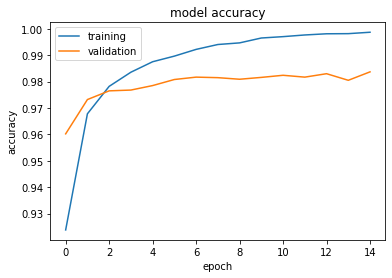

Test loss: 0.0779
Test accuracy: 0.984


In [122]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

After tuning the layers, nodes, activation, optimizers, batch size, and epochs. I created a MLP with a single layer of 512 nodes, using the relu activation, RMSprop optimizer, with batch size of 128 and 15 epochs. 

I found that smaller batch sizes and more epochs produced higher accuracies to a certain point. 

Test loss: 0.0779
Test accuracy: 0.984

In [6]:
# using GRID SEARCH

# def create_model(optimizer='RMSprop', activation='relu'):
#     model = Sequential()
#     model.add(Dense(64, activation = activation, input_shape=(784,)))
#     model.add(Dropout(0.1))
#     model.add(Dense(128, activation = 'softmax'))
#     model.add(Dense(10, activation = 'softmax'))
    
#     # Compile the model 
#     model.compile(loss='categorical_crossentropy',
#                   optimizer = optimizer,
#                   metrics=['accuracy'])

#     return model

In [7]:
# model.summary()

In [8]:
# import time
# start_time = time.time()

# model = KerasClassifier(build_fn=create_model, verbose=1)

# # define the grid search parameters
# batch_size = [32, 64, 128, 256, 512, 1024]
# epochs = [5, 10, 50, 100]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid']

# param_grid = dict(batch_size=batch_size,
#                   epochs=epochs,
#                   optimizer=optimizer,
#                   activation=activation
#                  )

# grid = GridSearchCV(estimator=model,
#                     param_grid=param_grid,
#                     n_jobs=-1,
#                     cv=3
#                    )
# grid_result = grid.fit(x_train, y_train,
#                       validation_data=(x_test, y_test)
#                       )

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# print('')

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# # for mean, stdev, param in zip(means, stds, params):
# #     print("%f (%f) with: %r" % (mean, stdev, param))

# print('')

# print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
# print(grid_result.best_params_)

In [10]:
# {'activation': 'tanh', 'batch_size': 64, 'epochs': 100, 'optimizer': 'Adamax'}

#optimizers - https://keras.io/optimizers/:
#     #SGD
#     #RMSprop
#     #Adagrad
#     #Adadelta
#     #Adam
#     #Adamax
#     #Nadam

# model = KerasClassifier(build_fn=create_model, verbose=0)
# model.set_params(**grid_result.best_params_)

# # define the grid search parameters
# optimizer = ['SGD', 'RMSprop']#, 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# activation = ['softmax', 'softplus']#, 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(optimizer=optimizer, activation=activation)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(x_train, y_train,
#                       validation_data=(x_test, y_test)
#                       )

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# print('')

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# # for mean, stdev, param in zip(means, stds, params):
# #     print("%f (%f) with: %r" % (mean, stdev, param))

In [11]:
#activations - https://keras.io/activations/:
    #elu
    #softmax
    #selu
    #softplus
    #softsign
    #relu
    #tanh
    #sigmoid
    #hard_sigmoid
    #exponential
    #linear

In [12]:
# history = model.fit(x_train, y_train,
#                     batch_size=64,
#                     epochs=100,
#                     verbose=1,
#                     validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])